In [1]:
import pm4py
import pandas
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de archivos y unificacion
event_log = pandas.read_csv('Data/A1-presencial-log.csv')
grades_data = pandas.read_csv("Data/A1-presencial-dataset.csv")
grades_data = grades_data[['Idusuario', 'DILEMA1C', 'DILEMA2C', 'HORARIO']]
event_log_grades = pandas.merge(left=event_log,
                    right=grades_data,
                    left_on='Idusuario',
                    right_on='Idusuario',
                    how="left")

# Filtro sobre los resultados: aprobados ambos cuestionarios vs suspenso uno o ambos.
event_log_pass = event_log_grades.loc[(event_log_grades['DILEMA1C']=='Pass') & (event_log_grades['DILEMA2C']=='Pass')]
event_log_pass = event_log_pass[~event_log_pass['NombreEvento'].str.contains(r'C?R+')]
event_log_pass = pm4py.format_dataframe(event_log_pass, case_id='Idusuario', activity_key='NombreEvento', timestamp_key='Hora')

event_log_fail = event_log_grades.loc[(event_log_grades['DILEMA1C']!='Pass') | (event_log_grades['DILEMA2C']!='Pass')]
event_log_fail = event_log_fail[~event_log_fail['NombreEvento'].str.contains(r'C?R+')]
event_log_fail = pm4py.format_dataframe(event_log_fail, case_id='Idusuario', activity_key='NombreEvento', timestamp_key='Hora')

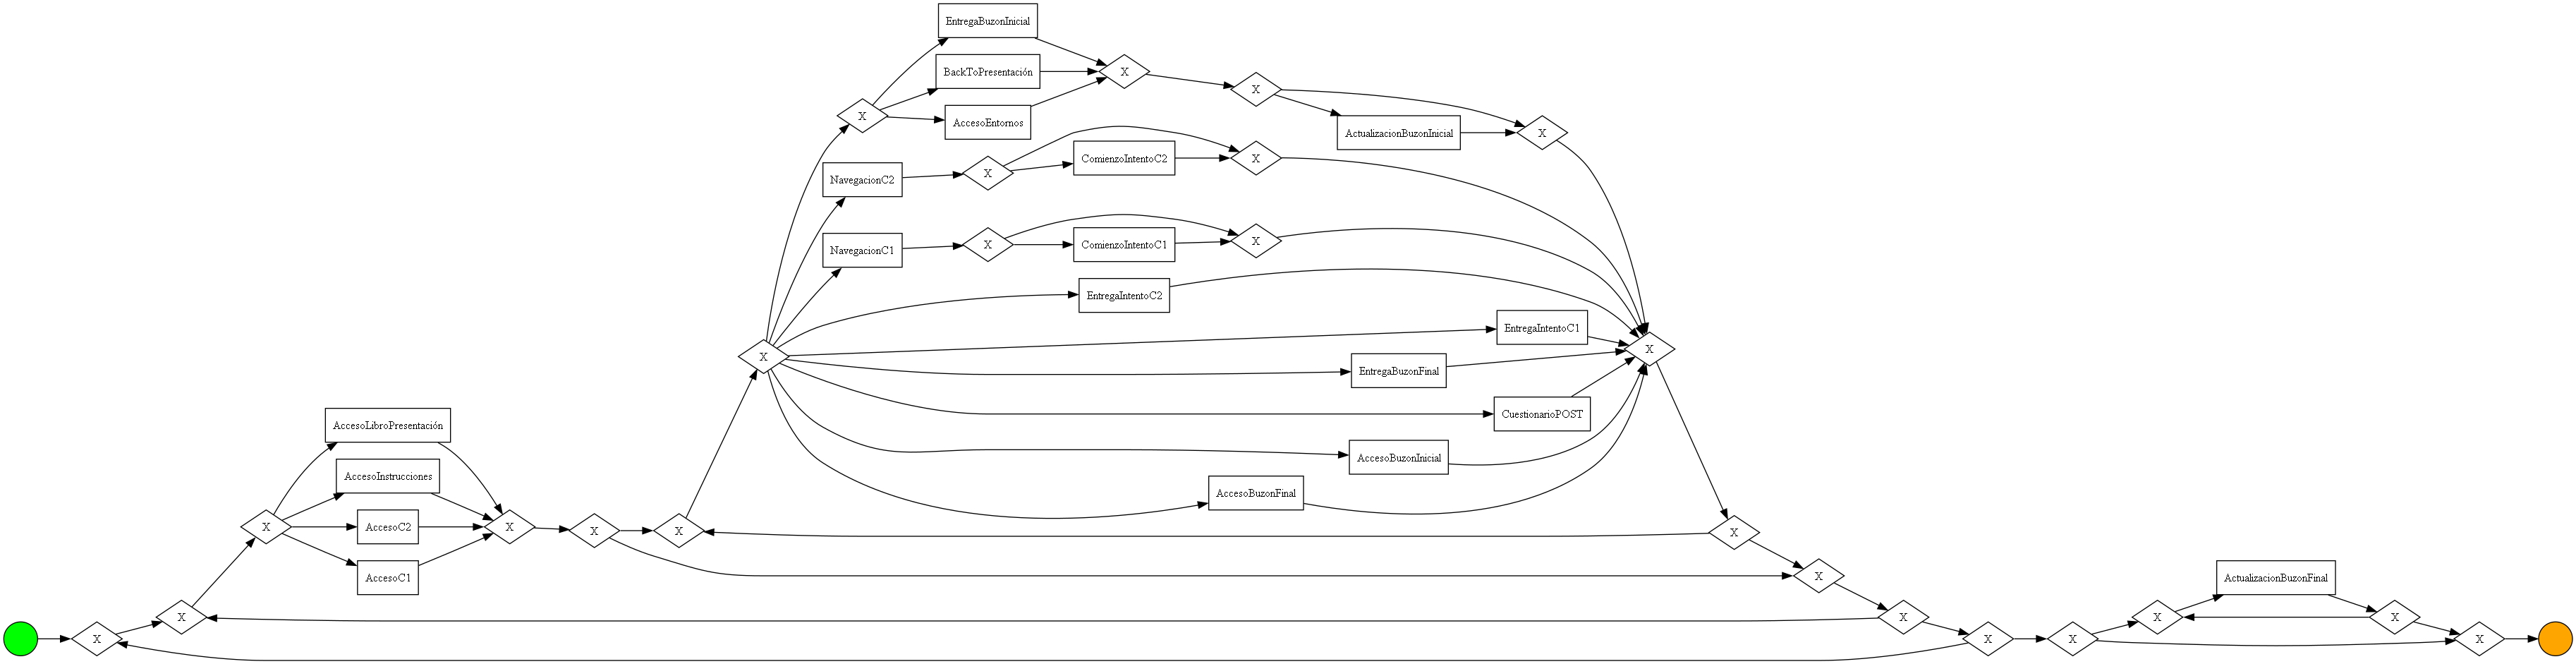

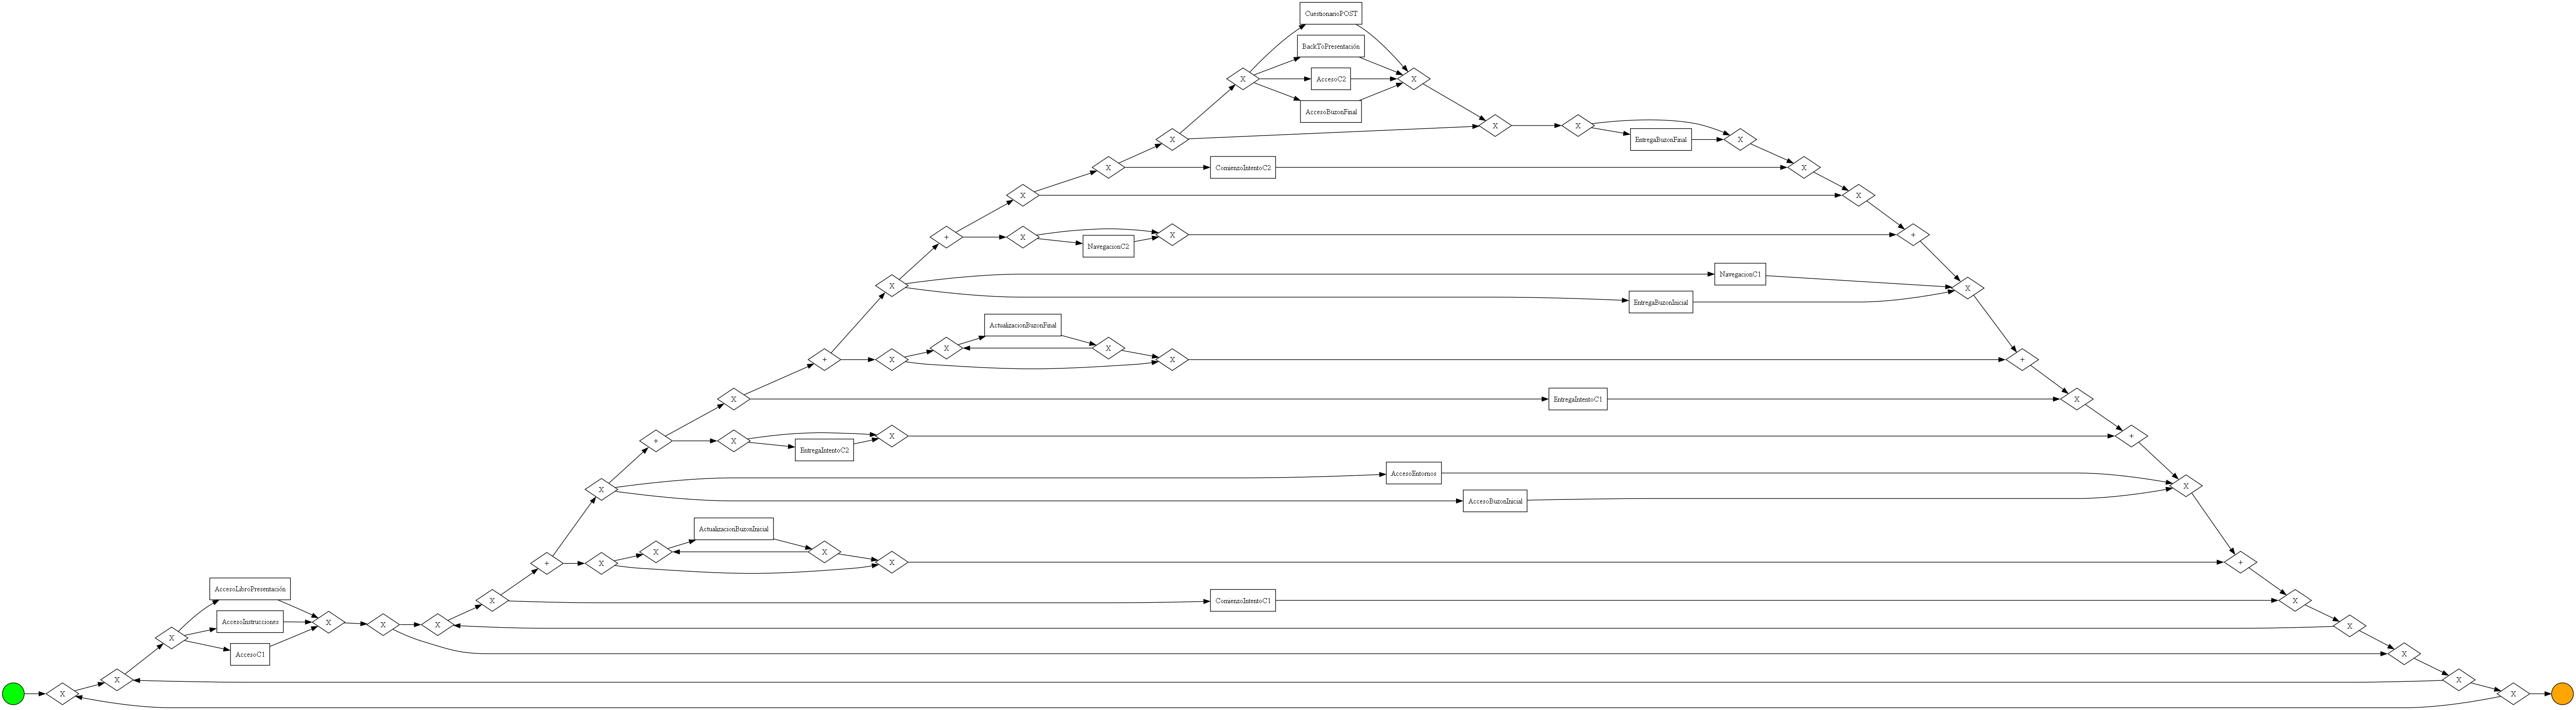

In [3]:
# Modelos BPMN
process_tree_pass = pm4py.discover_process_tree_inductive(event_log_pass)
bpmn_model_pass = pm4py.convert_to_bpmn(process_tree_pass)
pm4py.view_bpmn(bpmn_model_pass)

process_tree_fail = pm4py.discover_process_tree_inductive(event_log_fail)
bpmn_model_fail = pm4py.convert_to_bpmn(process_tree_fail)
pm4py.view_bpmn(bpmn_model_fail)

In [4]:
# pm4py.view_process_tree(process_tree_pass)
# pm4py.view_process_tree(process_tree_fail)

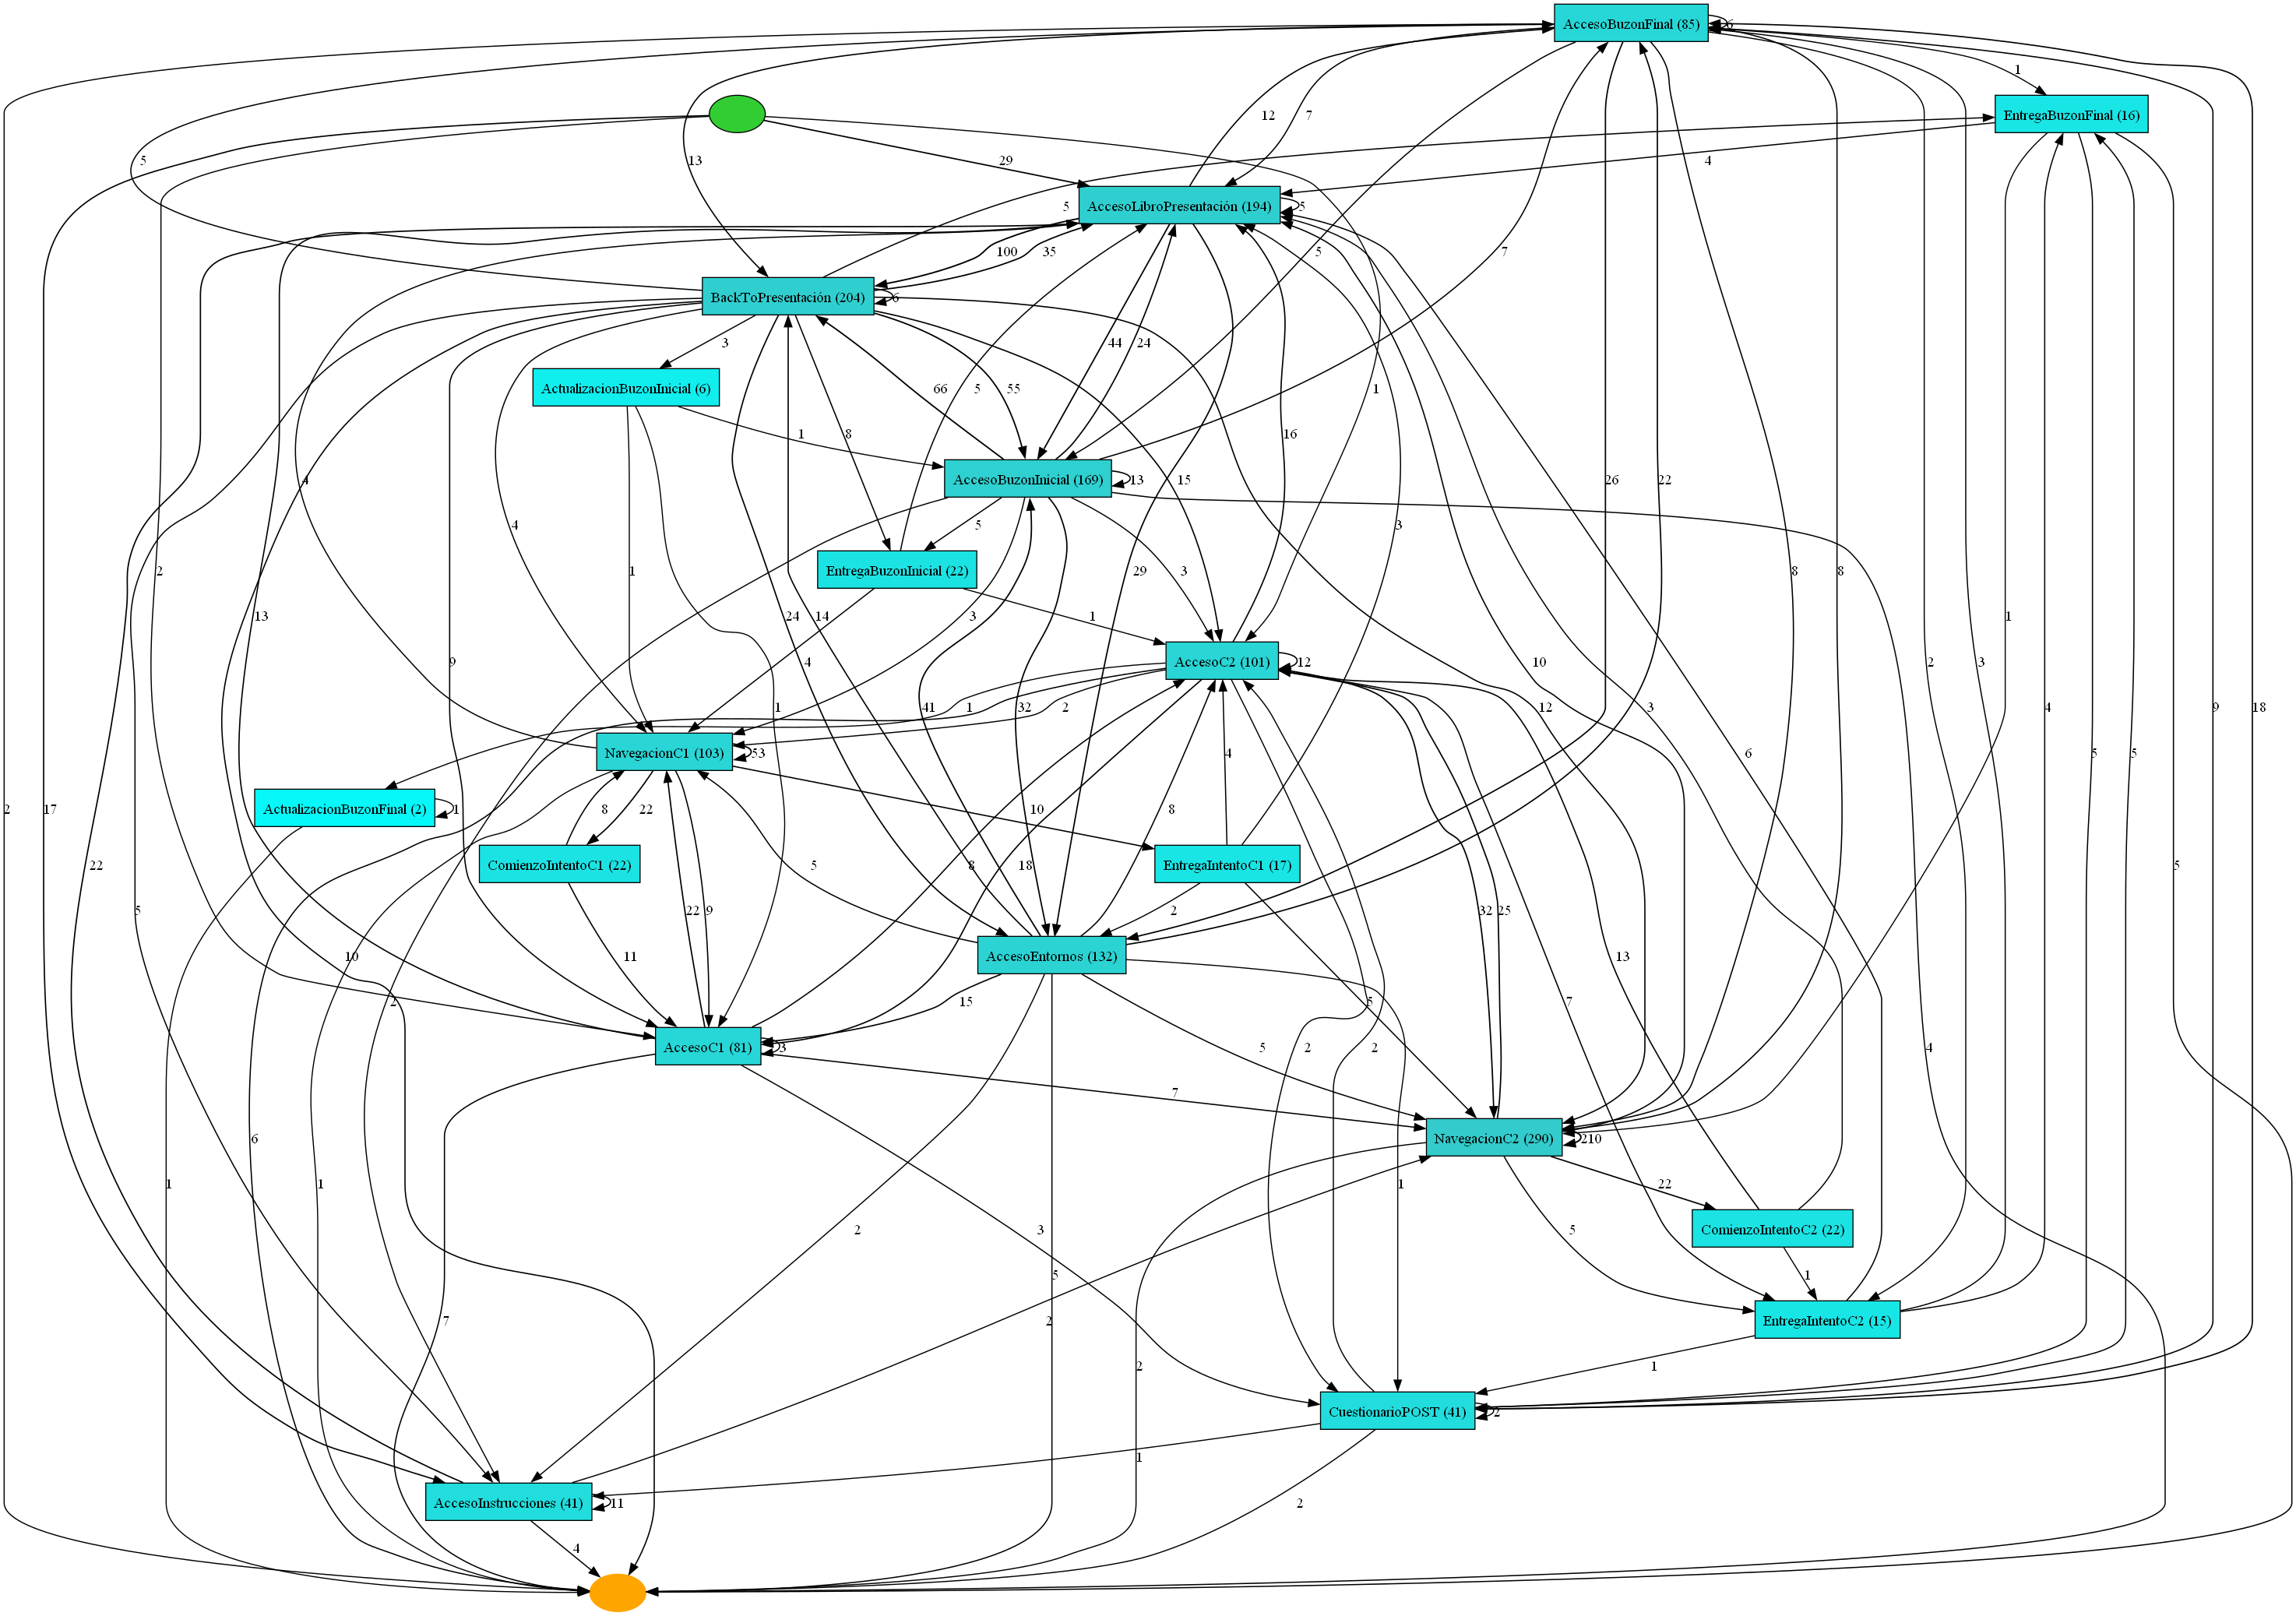

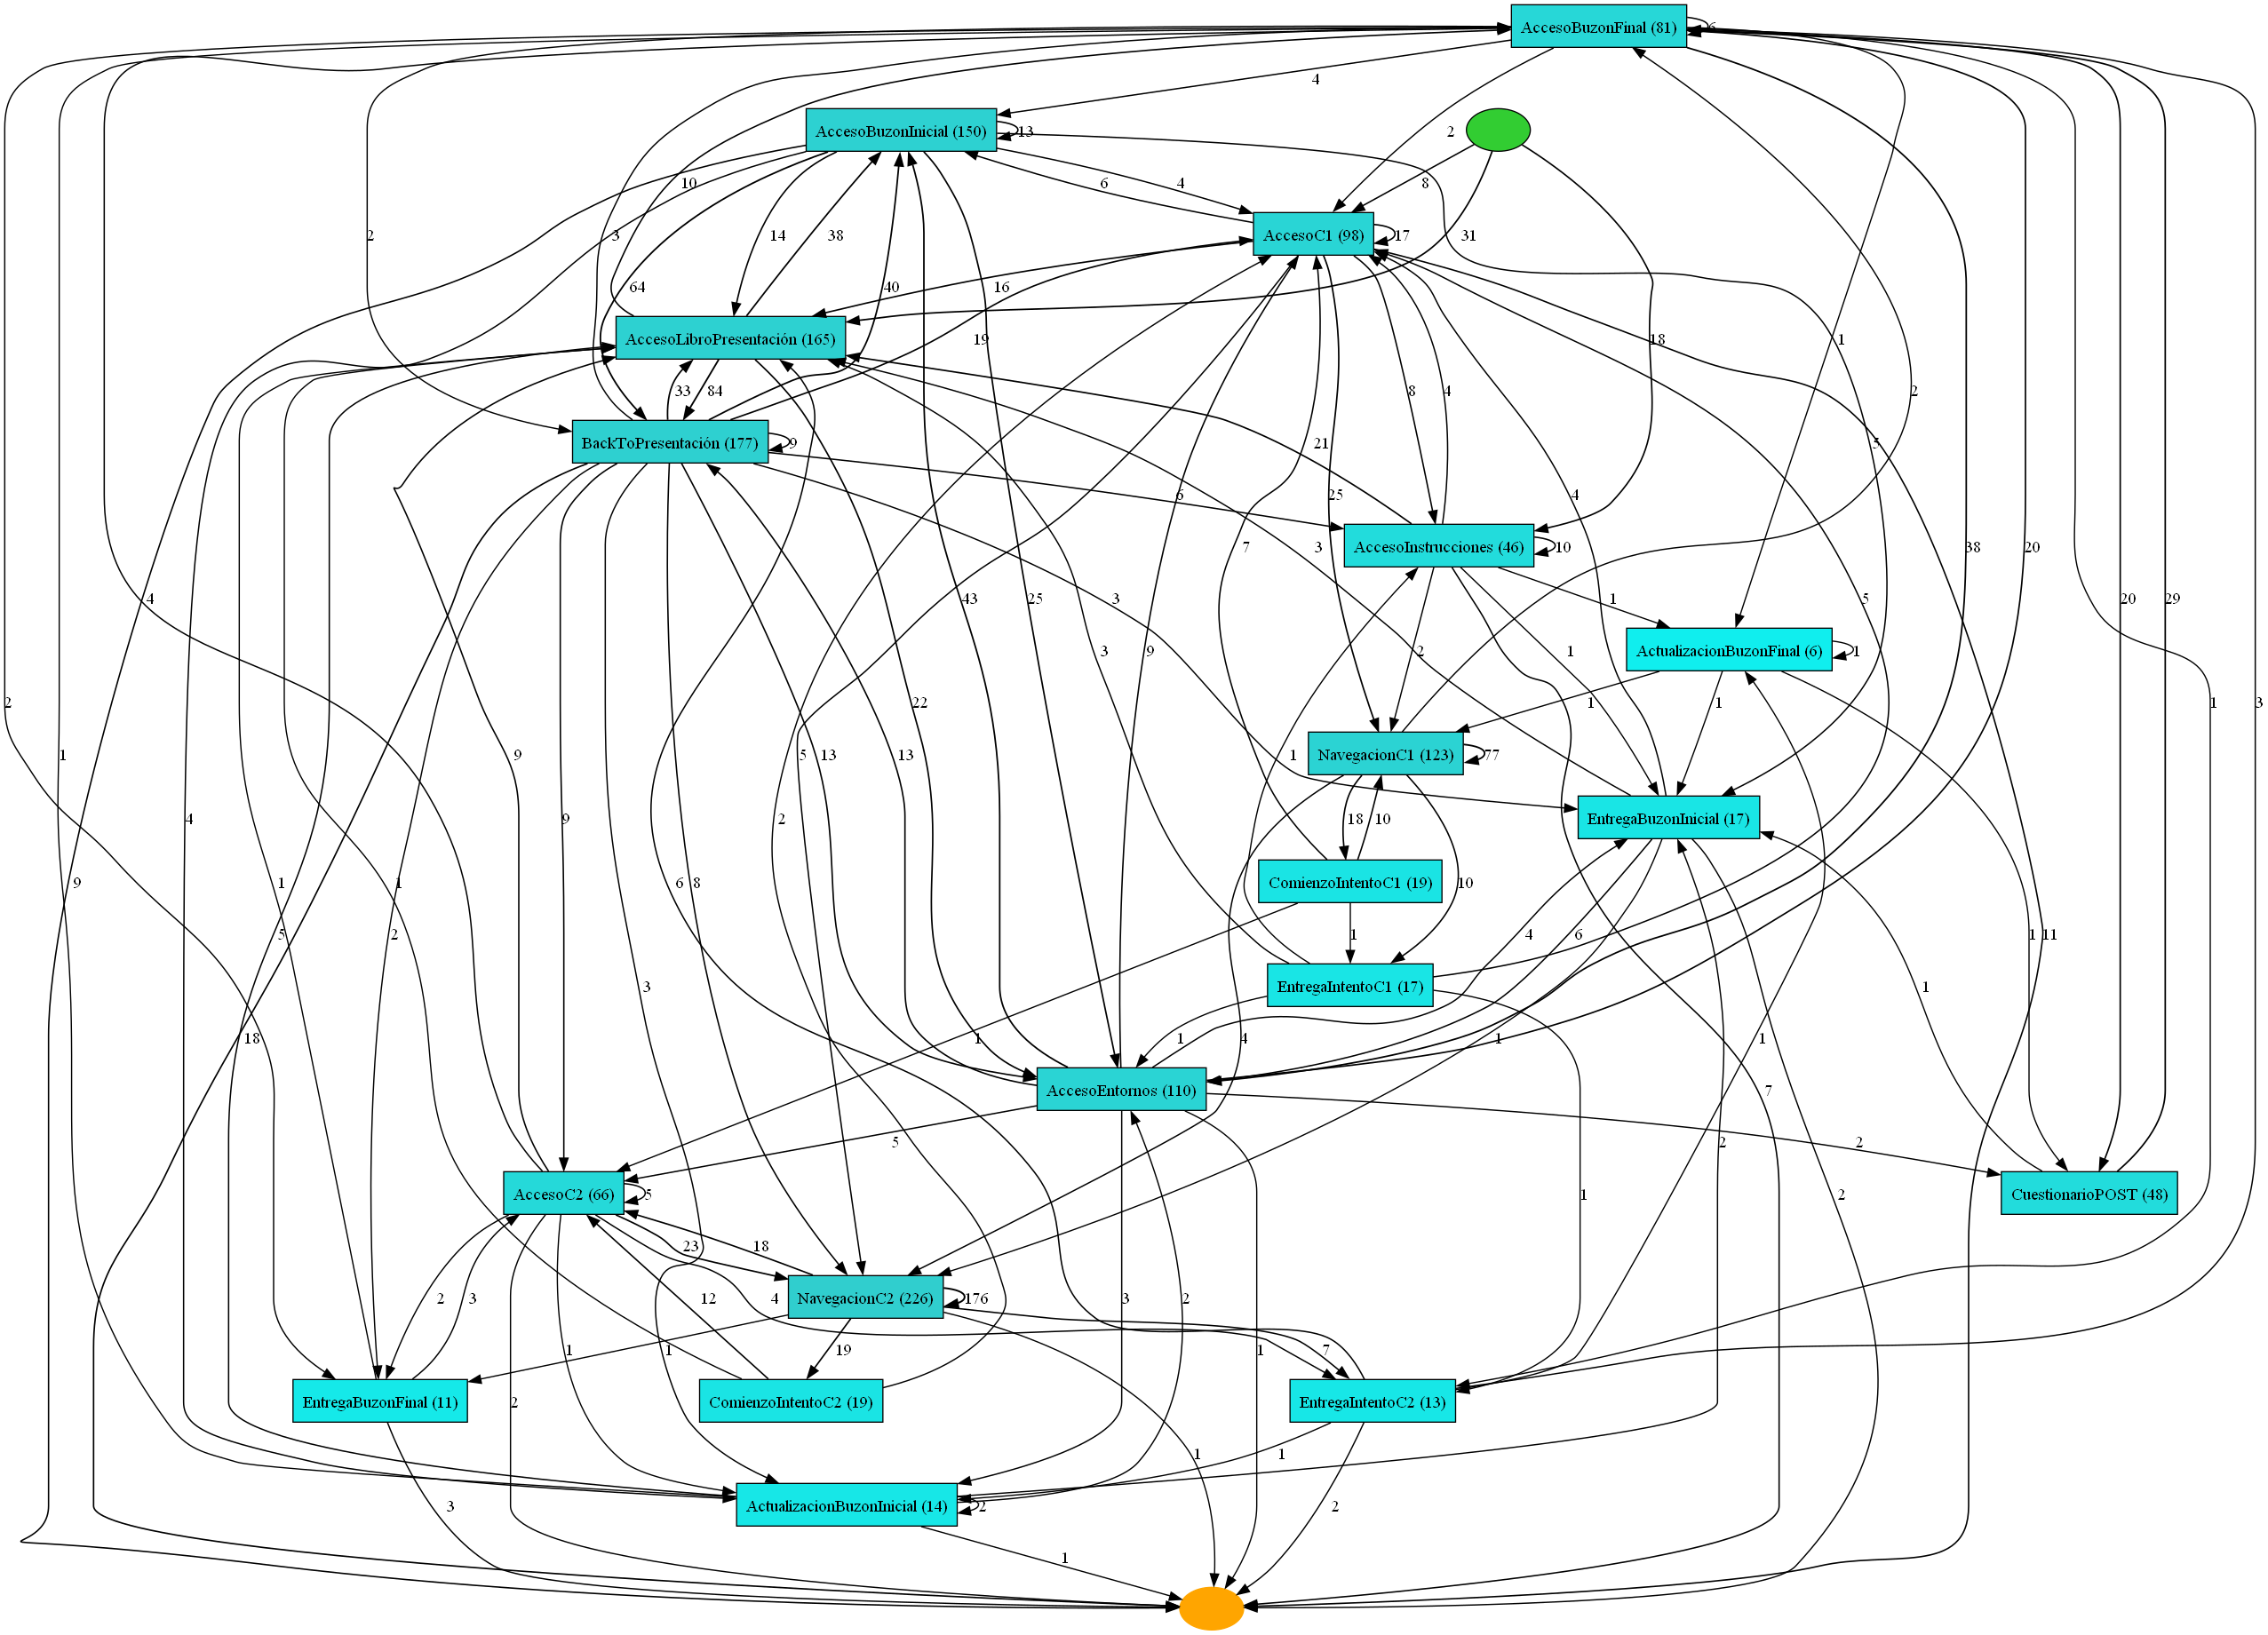

In [5]:
# dfg, start_activities, end_activities = pm4py.discover_dfg(event_log_filtered)
# pm4py.view_dfg(dfg, start_activities, end_activities)

map1 = pm4py.discover_heuristics_net(event_log_pass)
pm4py.view_heuristics_net(map1)

map2 = pm4py.discover_heuristics_net(event_log_fail)
pm4py.view_heuristics_net(map2)

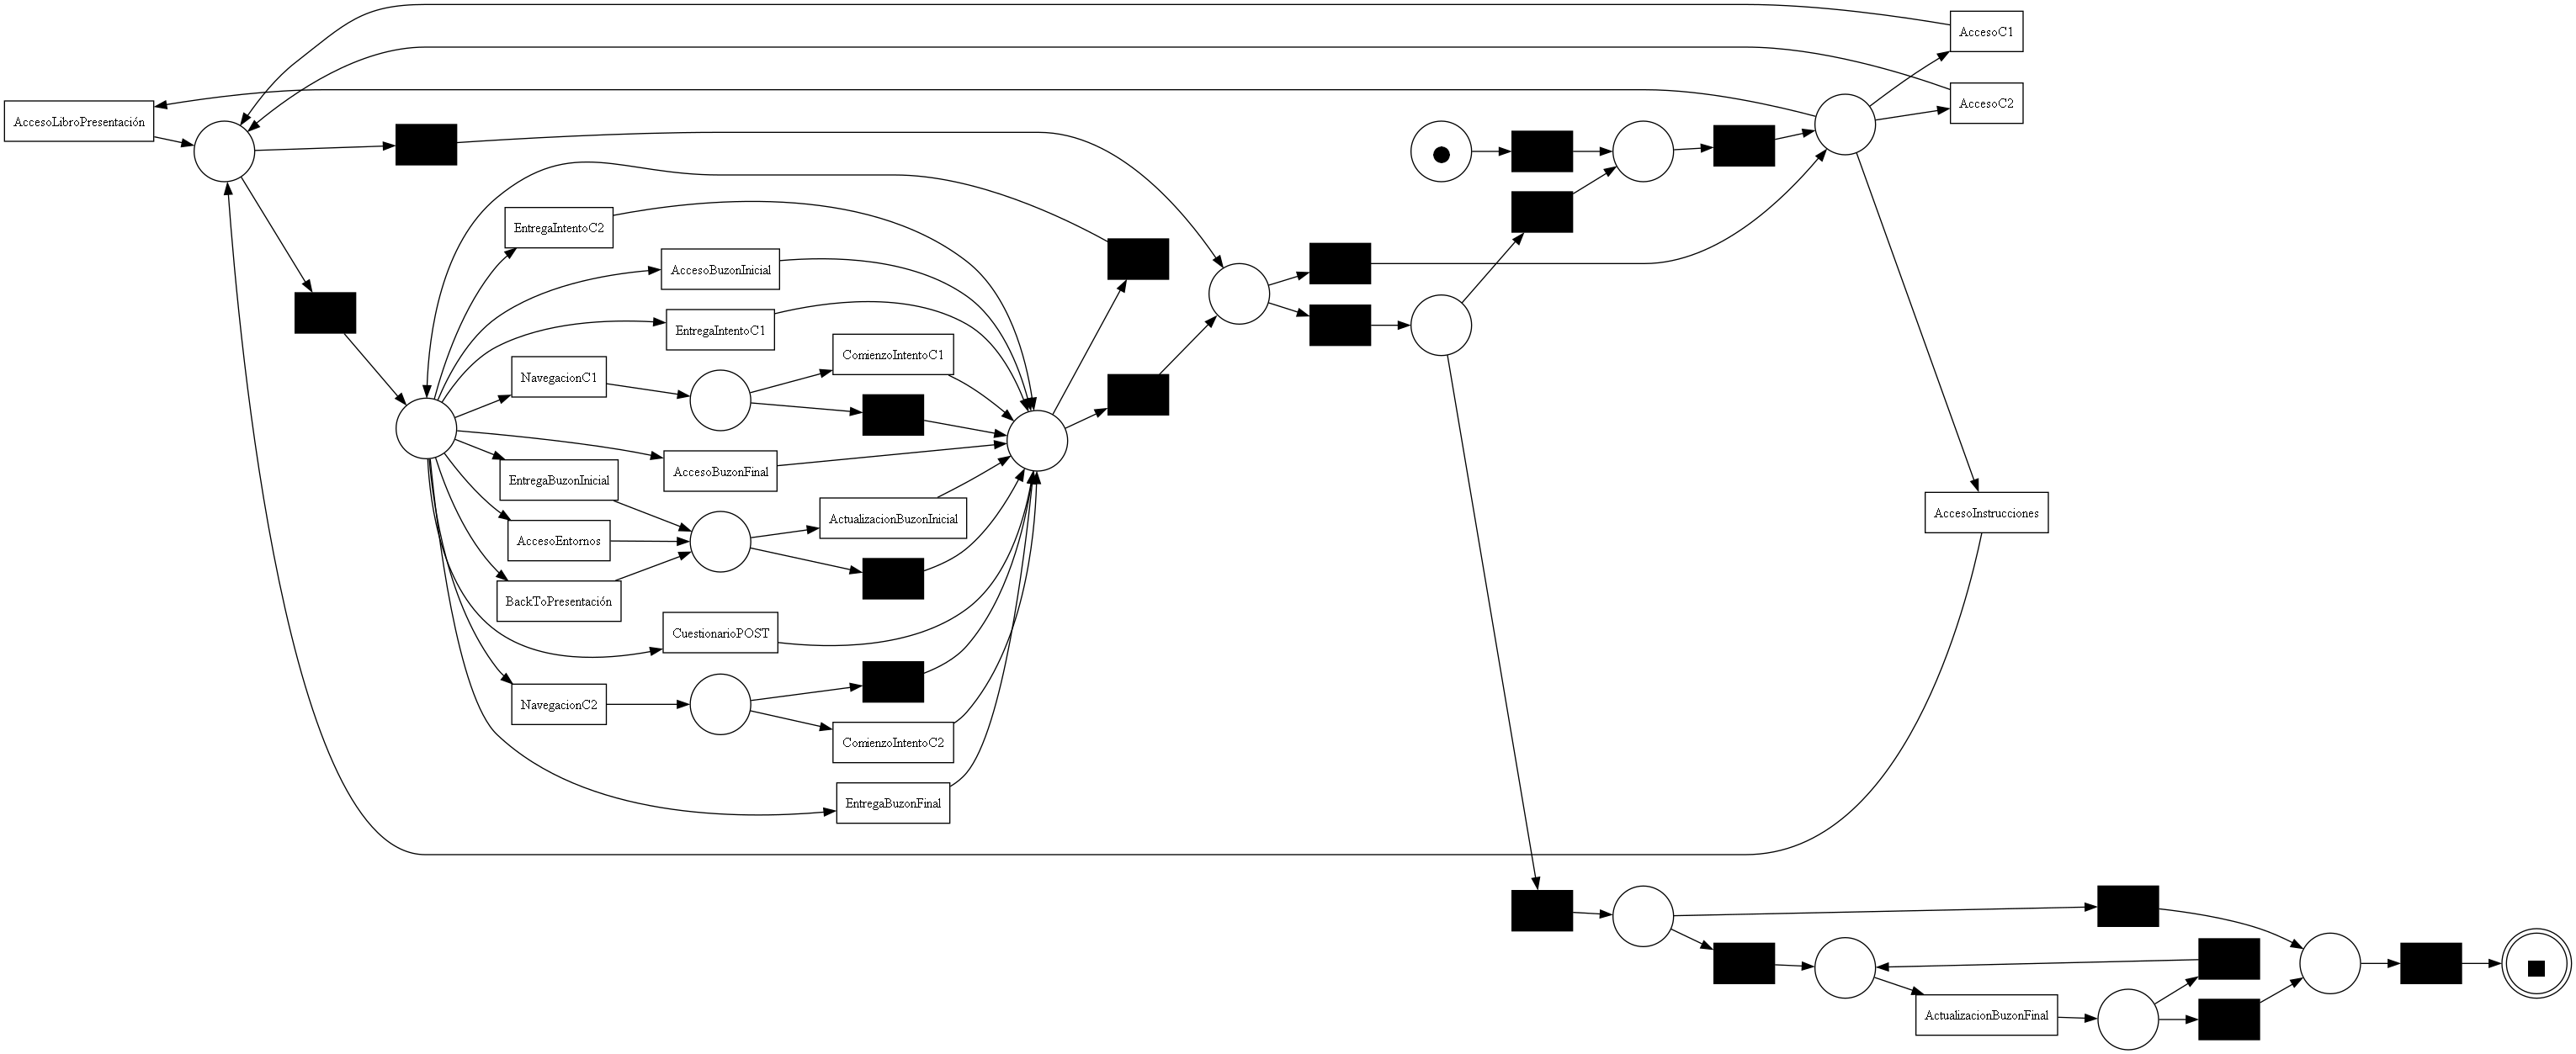

In [6]:
net_p, im_p, fm_p = pm4py.discover_petri_net_inductive(event_log_pass)
pm4py.view_petri_net(net_p, im_p, fm_p)

net, im, fm = pm4py.discover_petri_net_inductive(event_log_fail)
pm4py.view_petri_net(net, im, fm)

In [7]:
### MOVIDO A Modelos-varios-Auto
#
# # Modelos segun el horario: manyana
# event_log_M = event_log_grades.loc[(event_log_grades['HORARIO']=='M')]
# event_log_M = event_log_M[~event_log_M['NombreEvento'].str.contains(r'C?R+')]
# event_log_M = pm4py.format_dataframe(event_log_M, case_id='Idusuario', activity_key='NombreEvento', timestamp_key='Hora')
#
# process_tree_M = pm4py.discover_process_tree_inductive(event_log_M)
# bpmn_model_M = pm4py.convert_to_bpmn(process_tree_M)
# pm4py.view_bpmn(bpmn_model_M)
# pm4py.save_vis_bpmn(bpmn_model_M, 'Graphs/Horario/Models/M-Modelo.png')
#
# net, im, fm = pm4py.discover_petri_net_inductive(event_log_M)
# pm4py.view_petri_net(net, im, fm)
# pm4py.save_vis_petri_net(net, im, fm, 'Graphs/Horario/Petris/M-Petri.png')

In [8]:
### MOVIDO A Modelos-varios-Auto
#
# # Modelos segun el horario: tarde
# event_log_T = event_log_grades.loc[(event_log_grades['HORARIO']=='T')]
# event_log_T = event_log_T[~event_log_T['NombreEvento'].str.contains(r'C?R+')]
# event_log_T = pm4py.format_dataframe(event_log_T, case_id='Idusuario', activity_key='NombreEvento', timestamp_key='Hora')
#
# process_tree_T = pm4py.discover_process_tree_inductive(event_log_T)
# bpmn_model_T = pm4py.convert_to_bpmn(process_tree_T)
# pm4py.view_bpmn(bpmn_model_T)
# pm4py.save_vis_bpmn(bpmn_model_T, 'Graphs/Horario/Models/T-Modelo.png')
#
# net, im, fm = pm4py.discover_petri_net_inductive(event_log_T)
# pm4py.view_petri_net(net, im, fm)
# pm4py.save_vis_petri_net(net, im, fm, 'Graphs/Horario/Petris/T-Petri.png')